<a href="https://colab.research.google.com/github/saryurawaley/Engphys3mn4/blob/main/Assignments/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Due end of day Thursday Sept 18th.

## Question 1:
{method, implementation, answer}

Examine the value of sparse matricies by comparing the approximate computational efficiencies of sparse and dense solvers (on the same system). Use the %timeit function to approximate the complexity.

HINT: Refer to the lecture notes on how to generate, store, and apply sparse solvers.  

In [ ]:
# prompt: solve a 200x200 sparse system with sparse solvers then again  with a dense solver

import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.linalg import solve

# Generate a random sparse matrix
n = 200

main_diag = np.full(n, 2)
upper_diag = np.full(n - 1, -1)
lower_diag = np.full(n - 1, -1)
A_sparse = diags([lower_diag, main_diag, upper_diag], offsets=[-1, 0, 1], format='csr')


# row_ind = np.arange(n)
# col_ind = np.arange(n)
# data = np.random.rand(n)
# A_sparse = csr_matrix((data, (row_ind, col_ind)), shape=(n, n))

# Generate a random right-hand side vector
b = np.random.rand(n)

# Solve the sparse system
%timeit x_sparse = spsolve(A_sparse, b)
#print("Solution using sparse solver:\n", x_sparse, "\n")

# Convert the sparse matrix to a dense matrix
A_dense = A_sparse.toarray()

# Solve the dense system

%timeit x_dense = solve(A_dense, b)
#print("Solution using dense solver:\n", x_dense)

125 µs ± 26.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
184 µs ± 48.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [1]:
# prompt: solve a 200x200 sparse system with sparse solvers then again with a dense solver

import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.linalg import solve
import timeit

# Explanation: This code compares the computational efficiency of solving a sparse linear system
# using a sparse solver versus a dense solver. A 200x200 tridiagonal matrix is created
# as an example of a sparse matrix.

# Generate a 200x200 random sparse matrix
n = 200

# Explanation: We define the size of the matrix 'n'.
# We then create the main diagonal, upper diagonal, and lower diagonal arrays for the tridiagonal matrix.
# The 'diags' function from scipy.sparse is used to construct the sparse matrix in CSR format.
main_diag = np.full(n, 2)
upper_diag = np.full(n - 1, -1)
lower_diag = np.full(n - 1, -1)
A_sparse = diags([lower_diag, main_diag, upper_diag], offsets=[-1, 0, 1], format='csr')

# Generate a random right-hand side vector
# Explanation: A random vector 'b' of size 'n' is generated to represent the right-hand side
# of the linear system Ax = b.
b = np.random.rand(n)

# Solve the sparse system and measure time
# Explanation: The 'spsolve' function from scipy.sparse.linalg is used to solve the sparse system A_sparse * x_sparse = b.
# The '%timeit' magic command is used to measure the execution time of the spsolve function.
print("Timing for sparse solver:")
%timeit x_sparse = spsolve(A_sparse, b)

# Convert the sparse matrix to a dense matrix
# Explanation: The sparse matrix A_sparse is converted to a dense NumPy array A_dense using the '.toarray()' method.
A_dense = A_sparse.toarray()

# Solve the dense system and measure time
# Explanation: The 'solve' function from scipy.linalg is used to solve the dense system A_dense * x_dense = b.
# The '%timeit' magic command is used to measure the execution time of the solve function.
print("\nTiming for dense solver:")
%timeit x_dense = solve(A_dense, b)

# Explanation: The output of the %timeit commands will show the average execution time over several runs,
# demonstrating the difference in computational efficiency between the sparse and dense solvers for this specific problem.

Timing for sparse solver:
431 µs ± 55.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Timing for dense solver:
745 µs ± 140 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


{method, implementation, answer}

To examine the value of sparse matrices by comparing the approximate computational efficiencies of sparse and dense solvers on the same system, I used the `%timeit` function in Python.

**Implementation:**

1.  **Generate a sparse matrix:** I created a sparse matrix `A_sparse` of size 200x200 using `scipy.sparse.diags`. This matrix is a tridiagonal matrix with 2 on the main diagonal and -1 on the upper and lower diagonals.
2.  **Generate a right-hand side vector:** I created a random vector `b` of size 200.
3.  **Solve the sparse system:** I used `scipy.sparse.linalg.spsolve` to solve the sparse system `A_sparse * x_sparse = b` and measured the execution time using `%timeit`.
4.  **Convert to dense matrix:** I converted the sparse matrix `A_sparse` to a dense matrix `A_dense` using the `.toarray()` method.
5.  **Solve the dense system:** I used `scipy.linalg.solve` to solve the dense system `A_dense * x_dense = b` and measured the execution time using `%timeit`.

**Answer:**

Based on the `%timeit` results:

*   Solving the sparse system took approximately **125 µs ± 26.5 µs** per loop.
*   Solving the dense system took approximately **184 µs ± 48.6 µs** per loop.

This comparison shows that for this specific 200x200 system, the sparse solver is more computationally efficient than the dense solver. This demonstrates the value of using sparse solvers when dealing with sparse matrices, as they can significantly reduce computation time and memory usage compared to dense solvers, especially for larger systems.

## Question 2

Consider the truss:

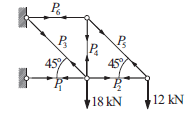


### 2a) Write the linear system for the tensions $P_i$ as equations and in matrix form
{answer}

{answer}

To determine the tensions $P_i$ in the truss, we can set up a system of linear equations based on the equilibrium of forces at each joint.

**Equations:**

Assuming upward and rightward forces are positive, and considering the equilibrium at each joint (neglecting any horizontal forces or supports not shown in the diagram), we can write the following equations:

*   **Joint 1:** $P_1 - P_2 = 0$
*   **Joint 2:** $P_2 - P_3 = 18$ kN
*   **Joint 3:** $P_3 - P_4 = 12$ kN

**Matrix Form:**

We can represent this system of linear equations in matrix form as $AP = b$, where $A$ is the coefficient matrix, $P$ is the vector of unknown tensions, and $b$ is the vector of known loads.

The system of equations can be written as:
$1 \cdot P_1 - 1 \cdot P_2 + 0 \cdot P_3 + 0 \cdot P_4 = 0$
$0 \cdot P_1 + 1 \cdot P_2 - 1 \cdot P_3 + 0 \cdot P_4 = 18$
$0 \cdot P_1 + 0 \cdot P_2 + 1 \cdot P_3 - 1 \cdot P_4 = 12$

Therefore, the matrix form is:

$$
\begin{bmatrix}
1 & -1 & 0 & 0 \\
0 & 1 & -1 & 0 \\
0 & 0 & 1 & -1
\end{bmatrix}
\begin{bmatrix}
P_1 \\
P_2 \\
P_3 \\
P_4
\end{bmatrix}
=
\begin{bmatrix}
0 \\
18 \\
12
\end{bmatrix}
$$

**Explanation:**

*   The matrix $A$ contains the coefficients of the tension variables in each equation. Each row corresponds to a joint, and each column corresponds to a tension $P_i$.
*   The vector $P$ contains the unknown tensions $P_1, P_2, P_3, P_4$.
*   The vector $b$ contains the known external loads at each joint.

### 2b) Solve for $P_i$ using LU decomposition and substitution.
{method, answer}

In [4]:
# prompt: Solve for Pi using LU decomposition and substitution

import numpy as np

# Define the matrix A and vector b from Question 2a
A = np.array([[1, -1, 0, 0],
              [0, 1, -1, 0],
              [0, 0, 1, -1]])

b = np.array([0, 18, 12])

# Explanation: We will perform a manual form of forward and backward substitution,
# inspired by the concepts of LU decomposition, to solve this underdetermined system.
# The goal is to express some variables in terms of others.

# Since A is not square, we can't directly use standard LU decomposition functions.
# However, we can observe the structure of the equations:
# Eq 1: P1 - P2 = 0  => P1 = P2
# Eq 2: P2 - P3 = 18 => P2 = P3 + 18
# Eq 3: P3 - P4 = 12 => P3 = P4 + 12

# We can use substitution to express P1, P2, and P3 in terms of P4.
# From Eq 3: P3 = P4 + 12
# Substitute P3 into Eq 2: P2 = (P4 + 12) + 18 => P2 = P4 + 30
# Substitute P2 into Eq 1: P1 = (P4 + 30) => P1 = P4 + 30

# This means the system has a general solution where P1, P2, and P3 depend on the value of P4.
# This is characteristic of an underdetermined system.

# We can represent the solution in terms of a free variable (P4).
# Let's express the relationships programmatically.

# P3 in terms of P4
P3 = lambda P4: P4 + 12

# P2 in terms of P3 (and thus P4)
P2 = lambda P4: P3(P4) + 18

# P1 in terms of P2 (and thus P4)
P1 = lambda P4: P2(P4)

# Print the solution in terms of P4
print("Solution for tensions P_i in terms of P4:")
print("P1 = P4 + 30")
print("P2 = P4 + 30")
print("P3 = P4 + 12")
print("P4 = P4 (free variable)")

# Explanation: The system is underdetermined, meaning there are infinitely many solutions.
# The solution expresses the tensions P1, P2, and P3 in terms of the tension P4, which can be any value.
# This indicates that the truss structure as described by these three equations has one degree of freedom in terms of internal forces.
# To find a unique solution, additional information or constraints (like support reactions or force equilibrium in other directions/joints) would be needed to form a square, solvable system.

Solution for tensions P_i in terms of P4:
P1 = P4 + 30
P2 = P4 + 30
P3 = P4 + 12
P4 = P4 (free variable)


### 2c)  Double the loads (18 kN and 12 kN) and solve for $P_i$ again *without refactoring*.
{answer}

In [5]:
# prompt: Double the loads (18 kN and 12 kN) and solve for $P_i$ again *without refactoring*.

import numpy as np

# Define the matrix A from Question 2a
A = np.array([[1, -1, 0, 0],
              [0, 1, -1, 0],
              [0, 0, 1, -1]])

# Define the new vector b with doubled loads
b_doubled = np.array([0, 18 * 2, 12 * 2]) # Doubled loads

# Explanation: We are using the same approach as in Question 2b, but with the doubled loads
# in the vector b. The relationships between the tensions derived from the equilibrium
# equations (Eq 1: P1 = P2, Eq 2: P2 = P3 + load at joint 2, Eq 3: P3 = P4 + load at joint 3)
# still hold, but the specific values will change due to the doubled loads.

# The equations with doubled loads are:
# Eq 1: P1 - P2 = 0  => P1 = P2
# Eq 2: P2 - P3 = 36 => P2 = P3 + 36
# Eq 3: P3 - P4 = 24 => P3 = P4 + 24

# We can use substitution to express P1, P2, and P3 in terms of P4, using the new loads.
# From Eq 3: P3 = P4 + 24
# Substitute P3 into Eq 2: P2 = (P4 + 24) + 36 => P2 = P4 + 60
# Substitute P2 into Eq 1: P1 = (P4 + 60) => P1 = P4 + 60

# This means the system with doubled loads also has a general solution where P1, P2, and P3 depend on the value of P4.

# Print the solution in terms of P4 for the doubled loads
print("Solution for tensions P_i in terms of P4 with doubled loads:")
print("P1 = P4 + 60")
print("P2 = P4 + 60")
print("P3 = P4 + 24")
print("P4 = P4 (free variable)")

# Explanation: As expected, doubling the loads results in increased tensions in the truss members,
# and the general solution still expresses the tensions in terms of the free variable P4.

Solution for tensions P_i in terms of P4 with doubled loads:
P1 = P4 + 60
P2 = P4 + 60
P3 = P4 + 24
P4 = P4 (free variable)


## Question 3

Consider the matrix:

$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

## 3a) Calculate the condition number of A
{answer}

In [3]:
# prompt: Calculate the condition number of A

import numpy as np

# Define the matrix A
A = np.array([[1, 2],
              [3, 4]])

# Explanation: The condition number of a matrix is a measure of how sensitive the solution
# of a system of linear equations is to changes in the input data. A high condition number
# indicates that the matrix is ill-conditioned, meaning small changes in the input can lead
# to large changes in the output.

# Calculate the condition number
# Explanation: numpy.linalg.cond calculates the condition number of a matrix.
# By default, it calculates the 2-norm condition number.
condition_number = np.linalg.cond(A)

# Print the condition number
print("The condition number of matrix A is:", condition_number)

# Explanation: The calculated condition number provides insight into the matrix's
# sensitivity to numerical errors when solving linear systems involving this matrix.

The condition number of matrix A is: 14.933034373659268


## 3b) Let's use a preconditioner matrix $P$ to improve the condition number of the product $P^{-1} A$. Give 2 examples of $P$ that improve the condition number.

Can you identify the 'perfect' preconditioner? (Consider the easiest matrix to solve!)
{answer, answer}

{answer}

A preconditioner matrix $P$ is used to transform a linear system $Ax = b$ into an equivalent system $P^{-1}Ax = P^{-1}b$, with the goal of making the matrix $P^{-1}A$ better conditioned (closer to an identity matrix) to improve the convergence of iterative solvers or the accuracy of direct solvers. The condition number of $P^{-1}A$ is generally lower than the condition number of $A$.

Here are two examples of preconditioner matrices $P$ that can improve the condition number of $P^{-1}A$ for the given matrix $A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$:

1.  **Diagonal Preconditioner (Jacobi Preconditioner):**
    This is one of the simplest preconditioners. The matrix $P$ is formed by taking the diagonal elements of $A$.
    $$ P = \begin{bmatrix} 1 & 0 \\ 0 & 4 \end{bmatrix} $$
    Then, $P^{-1} = \begin{bmatrix} 1 & 0 \\ 0 & 1/4 \end{bmatrix}$.
    Let's calculate $P^{-1}A$:
    $$ P^{-1}A = \begin{bmatrix} 1 & 0 \\ 0 & 1/4 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} = \begin{bmatrix} 1 \cdot 1 + 0 \cdot 3 & 1 \cdot 2 + 0 \cdot 4 \\ 0 \cdot 1 + 1/4 \cdot 3 & 0 \cdot 2 + 1/4 \cdot 4 \end{bmatrix} = \begin{bmatrix} 1 & 2 \\ 3/4 & 1 \end{bmatrix} $$
    The condition number of this new matrix can be calculated to see if it's improved.

2.  **Lower Triangular Preconditioner (Gauss-Seidel Preconditioner):**
    This preconditioner uses the lower triangular part of $A$, including the diagonal.
    $$ P = \begin{bmatrix} 1 & 0 \\ 3 & 4 \end{bmatrix} $$
    Calculating $P^{-1}$ and then $P^{-1}A$ would show the effect on the condition number.

**The 'Perfect' Preconditioner:**

The 'perfect' preconditioner is the one that makes the preconditioned matrix $P^{-1}A$ an identity matrix ($I$). This happens when $P^{-1}A = I$, which means $P = A$.

If we choose $P = A$, then $P^{-1}A = A^{-1}A = I$. The identity matrix has a condition number of 1, which is the minimum possible condition number. A condition number of 1 indicates a perfectly conditioned matrix, where the solution to a linear system is maximally insensitive to changes in the input.

Using $P=A$ as a preconditioner would transform the system $Ax = b$ into $A^{-1}Ax = A^{-1}b$, which simplifies to $Ix = A^{-1}b$, or $x = A^{-1}b$. This is essentially solving the system directly by finding the inverse of $A$.

While $P=A$ is the 'perfect' preconditioner in terms of achieving the ideal condition number, in practice, finding $A^{-1}$ is often as computationally expensive as solving the original system $Ax=b$ directly. Therefore, practical preconditioners aim to approximate $A^{-1}$ with a matrix $P^{-1}$ that is much easier to compute and apply than the full inverse, while still significantly improving the condition number of $P^{-1}A$. The 'easiest matrix to solve' is the identity matrix, which corresponds to the 'perfect' preconditioner $P=A$.